In [0]:

import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv('diabetes.csv')

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

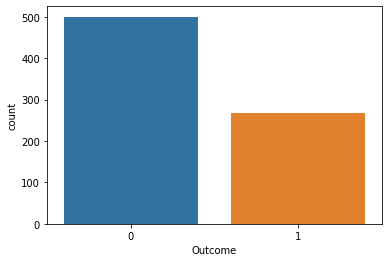

In [12]:

sns.countplot(x=data.Outcome,data=data)

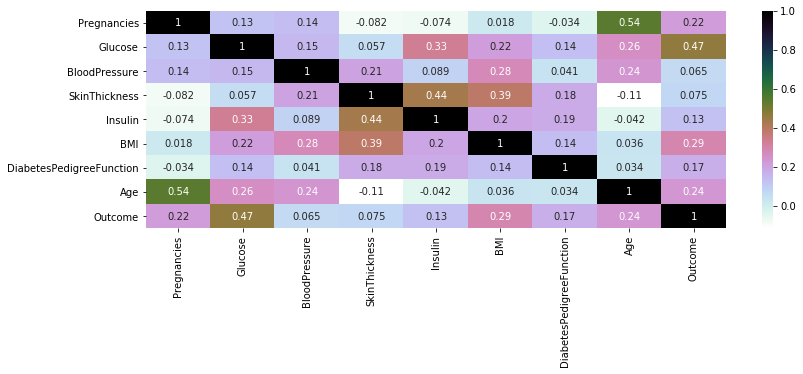

In [13]:
plt.figure(figsize=(13,4)) 
sns.heatmap(data.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

As the heat map shows the correlation between different parameters like as skin thickness is high positive correlated with BMI and  Insulin so in increase in   insulin and BMI increases also Skin thickness,Similarly Diabetes is positively correlated with Glucose.

In [0]:

y=data.Outcome.values
X_data =data.drop(['Outcome'] , axis =1)
X_data.head()

x = X_data-np.min(X_data)/np.max(X_data)-np.min(X_data)

In [0]:

X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=0 )

In [17]:
accuracies = {}

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,Y_train)
acc = lr.score(X_test,Y_test)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy  " ,acc)

Test Accuracy   81.16883116883116


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [18]:
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier(n_estimators = 1000 )
rf.fit(X_train,Y_train)
acc= rf.score(X_test,Y_test)*100
accuracies['RandomForest']=acc
print("Accuracy from Randomforest ",acc)

Accuracy from Randomforest  81.81818181818183


In [19]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)

acc = nb.score(X_test,Y_test)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes:  ",acc)

Accuracy of Naive Bayes:   79.22077922077922


In [20]:

from sklearn.svm import SVC
svm=SVC(random_state =1)
svm.fit(X_train,Y_train)
acc = svm.score(X_test,Y_test)*100
accuracies["Support Vector"]=acc
print("Support vector  ",acc)

Support vector   79.22077922077922


In [21]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

acc = dtc.score(X_test, Y_test)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy " ,acc)

Decision Tree Test Accuracy  78.57142857142857
